In [81]:
## Do imports
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io as sio
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [15]:
## Load data
npy_data = np.load("project_data"+os.path.sep+"F.npy") # Load a npy file
os.path.join("project_data", "F.npy") # Alternative way of getting path

'project_data\\F.npy'

In [20]:
# load mat files
mat_data = sio.loadmat("project_data"+os.path.sep+"Fall.mat")
mat_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'stat', 'ops', 'F', 'Fneu', 'spks', 'iscell'])

In [21]:
F_mat = mat_data['F'] # Find right variable
F_mat

array([[ 578.18634,  551.211  ,  526.3149 , ..., 3715.1895 , 3529.3538 ,
        3757.7927 ],
       [ 554.3312 ,  537.1357 ,  510.56317, ...,  512.9246 ,  467.88855,
         487.53806],
       [ 538.4401 ,  510.4755 ,  510.2392 , ...,  450.12943,  485.84912,
         483.79425],
       ...,
       [ 183.33038,  206.2507 ,  206.34438, ...,  209.50523,  184.9364 ,
         190.669  ],
       [ 237.69643,  222.49652,  244.7992 , ...,  208.6838 ,  213.75262,
         205.70918],
       [ 241.07825,  212.3035 ,  194.00748, ...,  158.34843,  157.91574,
         159.4307 ]], dtype=float32)

In [27]:
# Load csv files
locomotion = np.genfromtxt("project_data"+os.path.sep+"locomotion.csv", 
                           delimiter =',', skip_header = 1, usecols = 1)


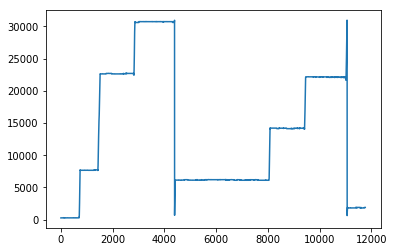

In [29]:
## Initial plots
plt.plot(locomotion)

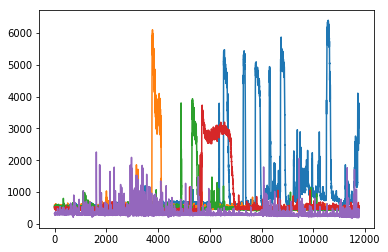

In [33]:
plt.plot(F_mat[0:5].T)

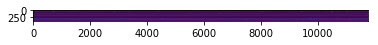

In [34]:
plt.imshow(F_mat)

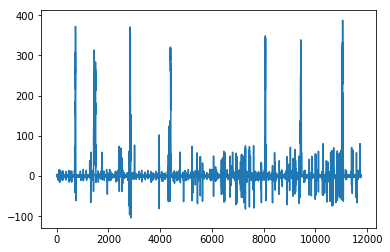

In [40]:
## Calculate velocity from locomotion
vel = np.diff(locomotion)
vel[vel<-2500] = np.nan
plt.plot(vel)

In [47]:
np.save("project_data"+os.path.sep+"velocity.npy", vel)
vel_dict = {'velocity': vel}
sio.savemat("project_data"+os.path.sep+"velocity.mat", vel_dict)
np.savetxt("project_data"+os.path.sep+"velocity.csv", vel, delimiter = ',')

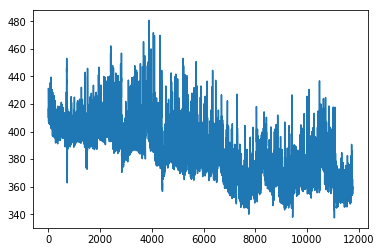

In [53]:
## Calculate average fluorescence
F_mat.shape
np.nanmean(F_mat, axis=0).shape
ave_fluorescence = np.nanmean(F_mat, axis=0)
plt.plot(ave_fluorescence)

In [60]:
vel = np.insert(vel, 0, np.nan)
ave_fluorescence[:-1]

(11763,)
(11763,)


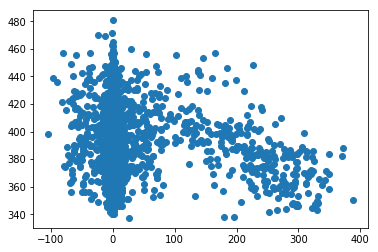

In [62]:
## Correlate fluorescence x velocity

plt.scatter(vel, ave_fluorescence)
print(vel.shape)
print(ave_fluorescence.shape)


In [77]:
np.corrcoef(vel[~np.isnan(vel)], ave_fluorescence[~np.isnan(vel)])

array([[ 1.       , -0.0240044],
       [-0.0240044,  1.       ]])

In [75]:
~np.isnan(vel)

array([False,  True,  True, ...,  True,  True,  True])

In [69]:
np.sum(np.isnan(ave_fluorescence[1:]))
np.sum(np.isnan(vel[1:]))

4

In [88]:
## Linear model to predict velocity from cell activity
reg_model = LinearRegression()
Y = vel[~np.isnan(vel)]
X = F_mat[:,~np.isnan(vel)]

In [89]:
print(Y.shape)
print(X.shape)

(11758,)
(371, 11758)


In [91]:
reg_model.fit(X.T,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
reg_model.score(X.T, Y)
reg_model.coef_

array([ 9.77221353e-05, -4.38747928e-04, -2.24113557e-03, -7.42962584e-07,
       -1.47607503e-03, -1.86875928e-04, -2.29259115e-03, -7.52041861e-03,
       -3.14193591e-03,  4.63772379e-02, -1.03138806e-03, -1.73456280e-03,
       -5.23379073e-04,  1.42704016e-02,  2.34390609e-04,  6.26847055e-03,
        4.51652072e-02, -4.67222324e-03, -2.07846472e-03, -4.72188462e-03,
       -9.71896807e-04,  7.79836625e-03,  7.64219612e-02,  4.81458567e-03,
       -8.32252484e-03,  3.45777487e-04, -1.75177772e-03, -4.11385819e-02,
        1.42085727e-03,  8.34958535e-03,  9.83159989e-05,  3.36350361e-03,
       -2.31469143e-03, -5.57089970e-02, -1.16910553e-04,  7.54947588e-03,
       -2.43549664e-02, -1.28687476e-04, -3.31630372e-02,  3.63936722e-02,
        2.44294503e-03, -6.81668660e-03, -1.19368255e-03,  5.36148995e-02,
        4.39577084e-03,  3.53747830e-02,  7.83628726e-04, -6.04704628e-03,
        8.61848332e-03, -6.87091611e-03,  1.42950984e-02, -1.52395852e-03,
       -2.99541112e-02,  

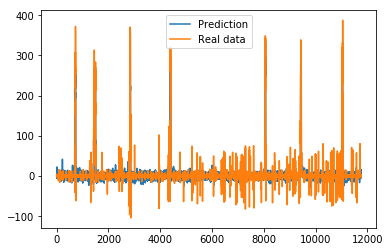

In [100]:
prediction = reg_model.predict(X.T)
plt.plot(prediction)
plt.plot(Y)
plt.legend(('Prediction', 'Real data'))

In [ ]:
## Clustering of cell

